In [50]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [52]:
df = pd.read_csv("./datasets/evdataset.csv")

In [53]:
df.head()

,id,Brand,link,City - Cold Weather,Highway - Cold Weather,Combined - Cold Weather,City - Mild Weather,Highway - Mild Weather,Combined - Mild Weather,Acceleration 0 - 100 km/h,...,Charge Speed,Fastcharge Speed,Length,Width,Height,Wheelbase,Gross Vehicle Weight (GVWR),Max. Payload,Cargo Volume,Seats
0,1647,Genesis,https://ev-database.org/car/1647/Genesis-GV60-...,390,275,330,575,355,445,7.8,...,49,1020,4515,1890,1580,2900,2495,595,432,5
1,1493,Mercedes,https://ev-database.org/car/1493/Mercedes-EQB-...,330,235,280,480,300,375,6.2,...,46,470,4684,1834,1701,2829,2580,480,495,7
2,1229,Porsche,https://ev-database.org/car/1229/Porsche-Tayca...,400,305,350,580,385,470,3.2,...,46,1020,4963,1966,1381,2900,2880,575,366,4
3,1252,BMW,https://ev-database.org/car/1252/BMW-i4-eDrive40,445,340,390,670,440,540,5.7,...,54,730,4783,1852,1448,2856,2605,555,470,5
4,1534,Volkswagen,https://ev-database.org/car/1534/Volkswagen-ID...,440,320,380,660,415,520,7.9,...,55,570,4261,1809,1568,2771,2300,447,385,5


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           194 non-null    int64  
 1   Brand                        194 non-null    object 
 2   link                         194 non-null    object 
 3   City - Cold Weather          194 non-null    int64  
 4   Highway - Cold Weather       194 non-null    int64  
 5   Combined - Cold Weather      194 non-null    int64  
 6   City - Mild Weather          194 non-null    int64  
 7   Highway - Mild Weather       194 non-null    int64  
 8   Combined - Mild Weather      194 non-null    int64  
 9   Acceleration 0 - 100 km/h    194 non-null    float64
 10  Top Speed                    194 non-null    int64  
 11  Electric Range               194 non-null    int64  
 12  Total Power                  194 non-null    int64  
 13  Total Torque        

In [88]:
corr_df = df.describe().corr()['Electric Range'].reset_index().sort_values(by='Electric Range', ascending=False).iloc[6:14]

In [97]:
df_index = list(corr_df['index'])
df_index.append('Electric Range')

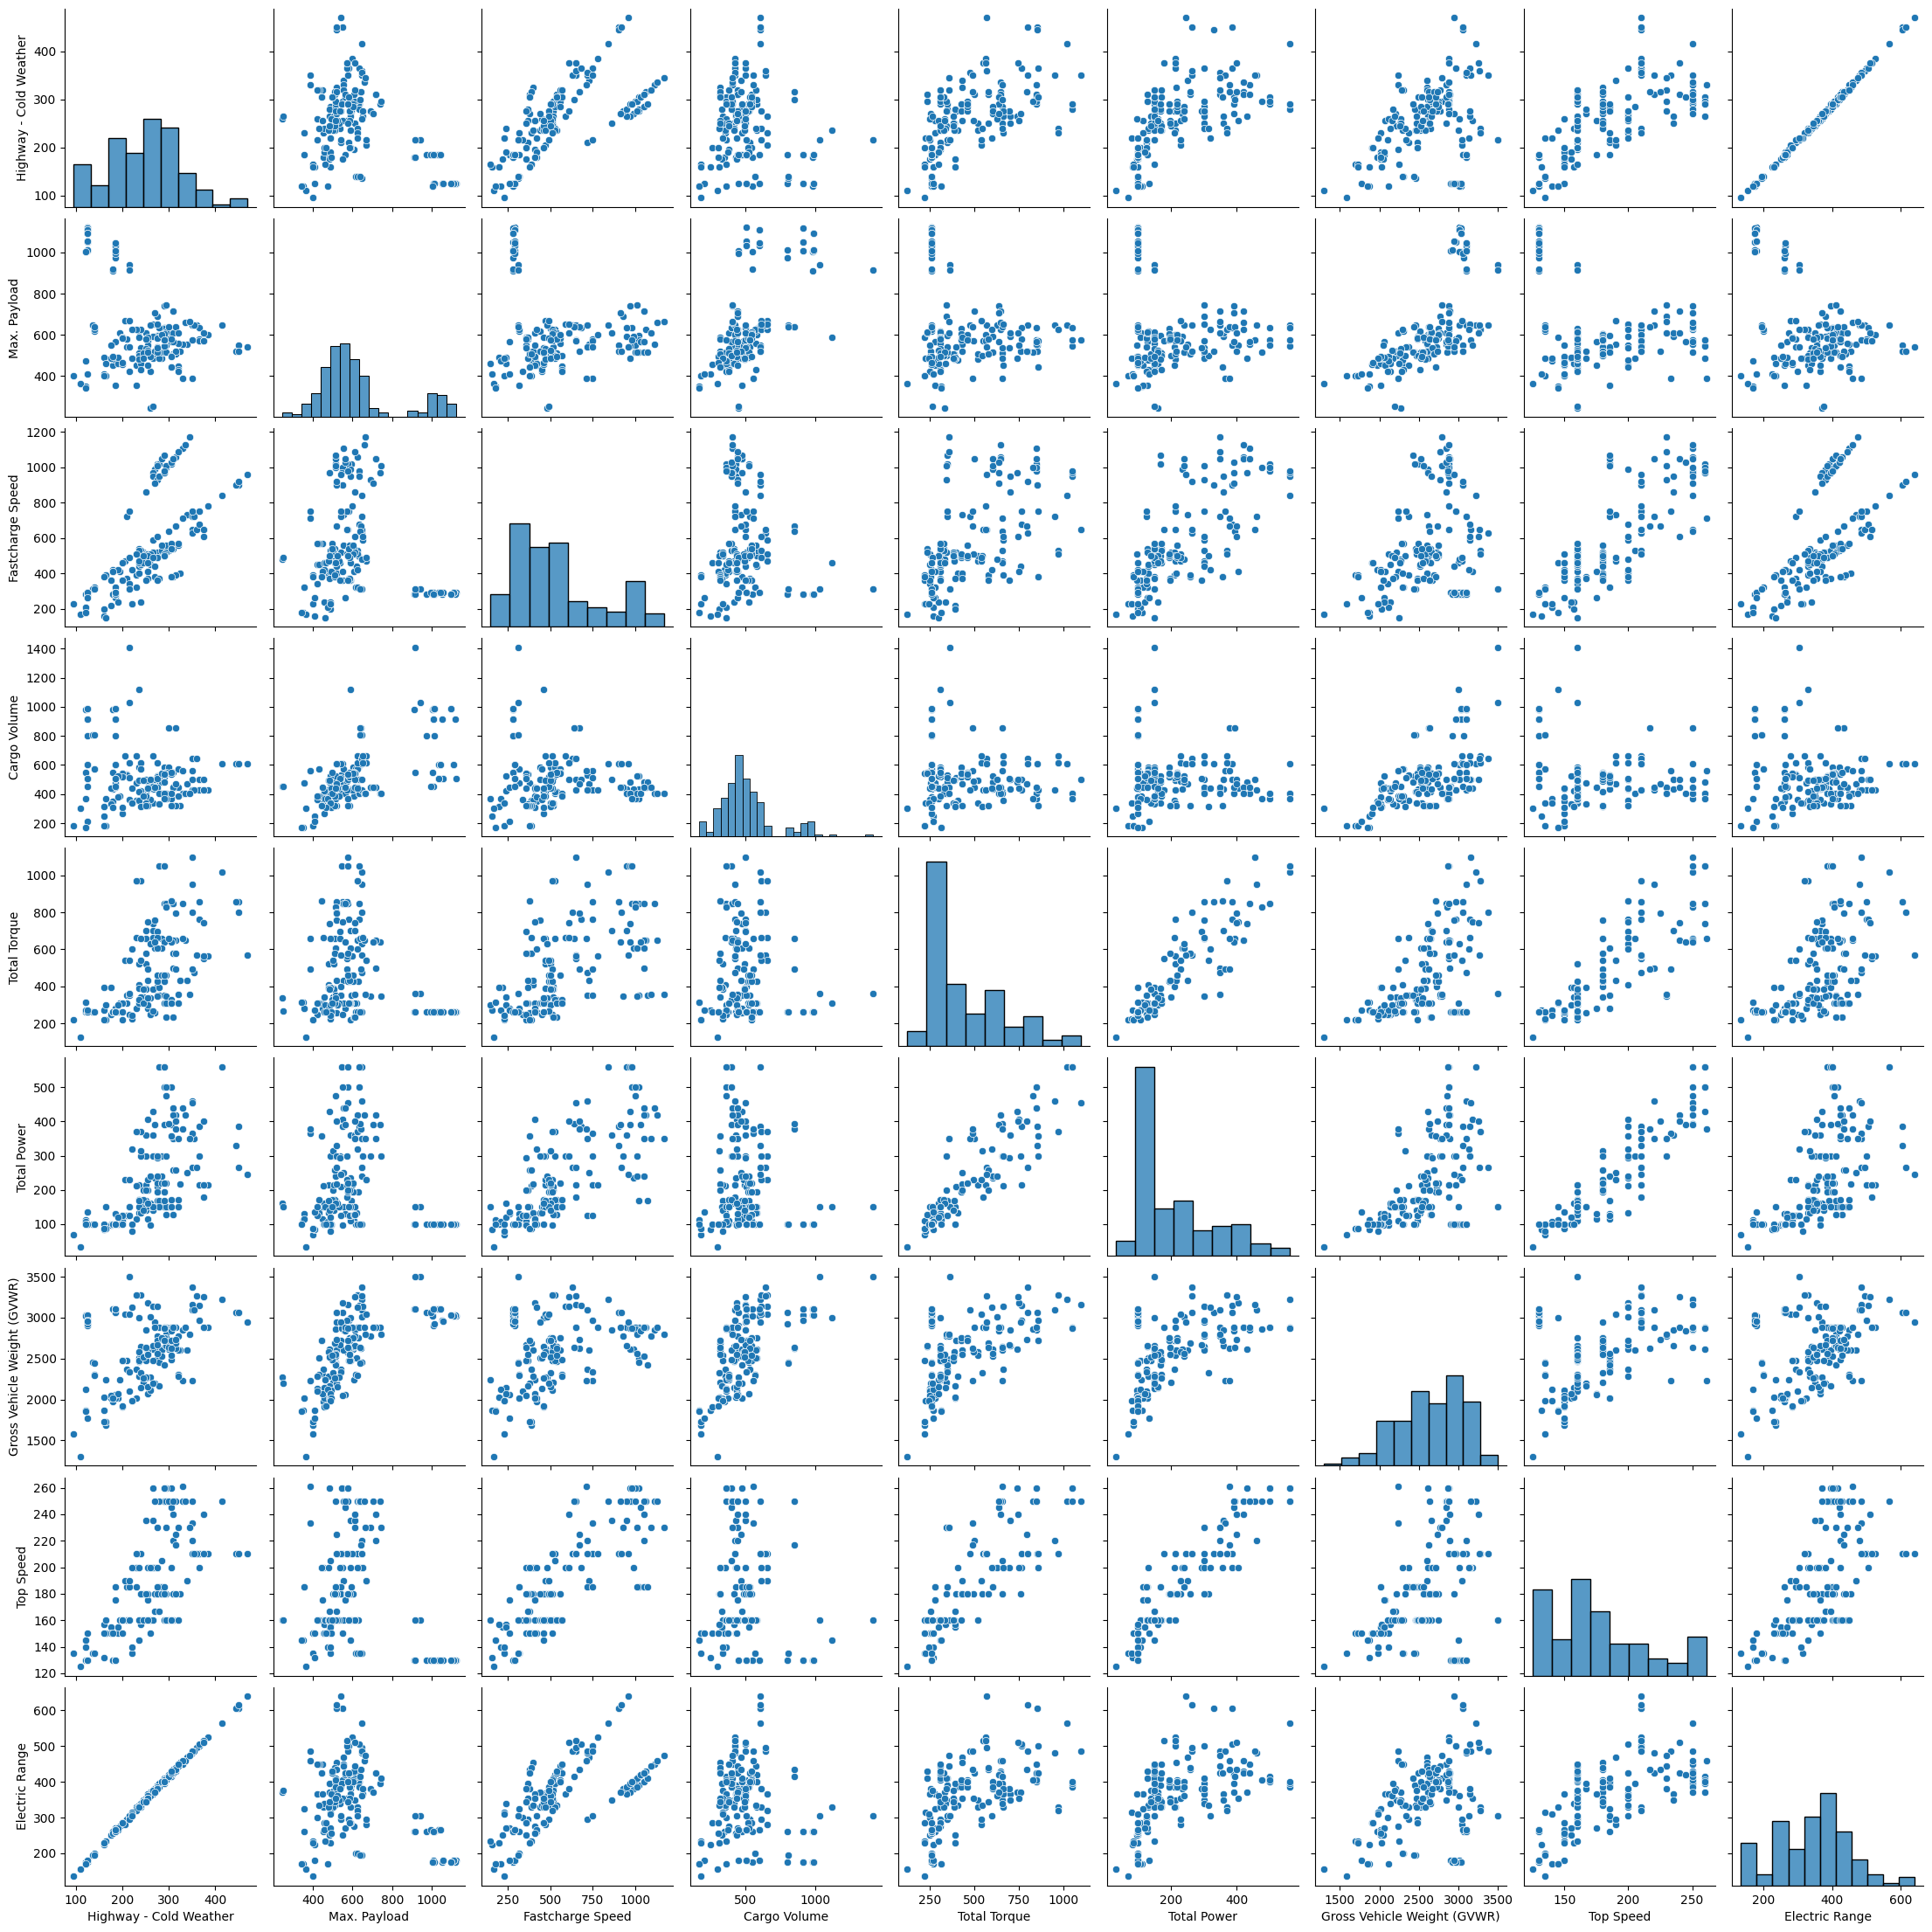

In [100]:
sns.pairplot(df[df_index])

<Axes: xlabel='Highway - Cold Weather', ylabel='Electric Range'>

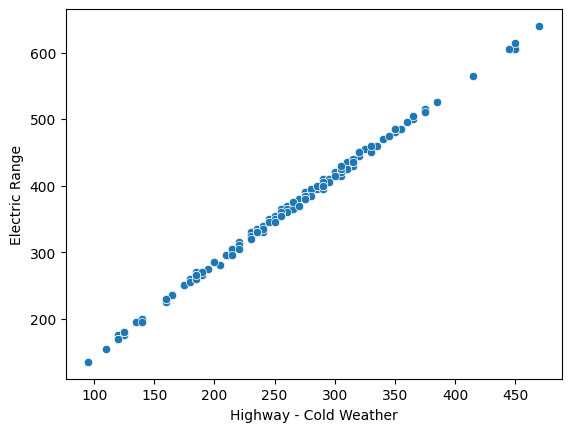

In [109]:
sns.scatterplot(x=df['Highway - Cold Weather'], y=df['Electric Range'])

In [206]:
X = df[df_index].drop(columns=['Electric Range']).values
y = df['Electric Range'].values

In [207]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
def evalution(model, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    model.fit(X_train, y_train)
    
    y_pred = lr.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    
    return {
        "model" : model,
        "r2_score" : r2,
        "X_test" : X_test,
        "y_test" : y_test,
        "y_pred" : y_pred
    }

In [208]:
# Base model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
res = evalution(lr, X, y)
res['r2_score']

0.9988214945164428

In [209]:
# l1 regulerization
from sklearn.linear_model import Lasso
lasso = Lasso()
evalution(lasso, X, y)
res = evalution(lasso, X, y)
res['r2_score']

0.9990270660746594

In [210]:
# l2 regulerization
from sklearn.linear_model import Ridge
ridge = Ridge()
res = evalution(ridge, X, y)
res['r2_score']

0.9987512867410132

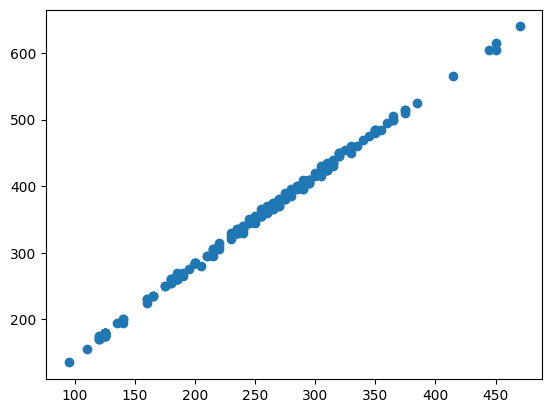

In [211]:
plt.scatter(x=df['Highway - Cold Weather'], y=df['Electric Range'])
# plt.plot(res['X_test'][:,0],res['y_test'], c='k')

In [212]:
# we can clearly see the differance and we can conclude that after using regulerization we can increase accuracy